<a href="https://colab.research.google.com/github/MahaGhonaim/AI4I-2020-Predictive-Maintenance/blob/main/AI4I_2020_Predictive_Maintenance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##Data Collection & Processing

In [ ]:
# load the data from csv file to Pandas DataFrame
machine_data = pd.read_csv('/content/ai4i2020.csv')

In [ ]:
# printing the first 5 rows of the dataframe
machine_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
# number of rows and Columns
machine_data.shape

(10000, 14)

In [ ]:
# getting some informations about the data
machine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
# check the number of missing values in each column
machine_data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

<Axes: >

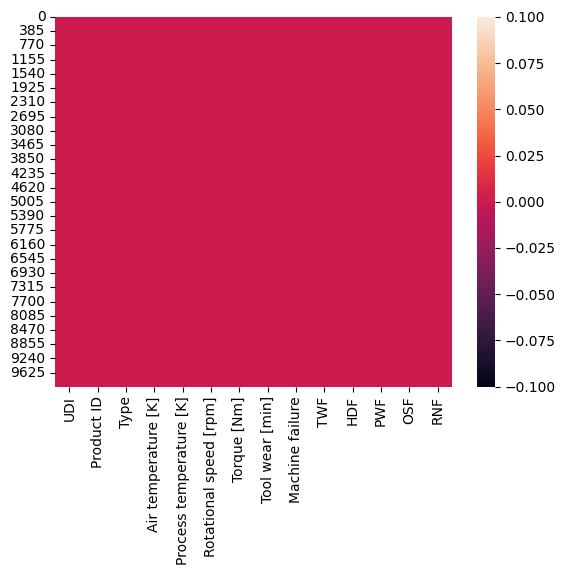

In [ ]:
sns.heatmap(machine_data.isnull())

In [ ]:
machine_data.drop(['UDI','Product ID'],axis=1,inplace=True)
machine_data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


##Data Analysis

In [ ]:
# getting some statistical measures about the data
machine_data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
# finding the number of Machine failure (1) and not failure(0)
machine_data['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

##Data Visualization

<Axes: xlabel='Machine failure', ylabel='count'>

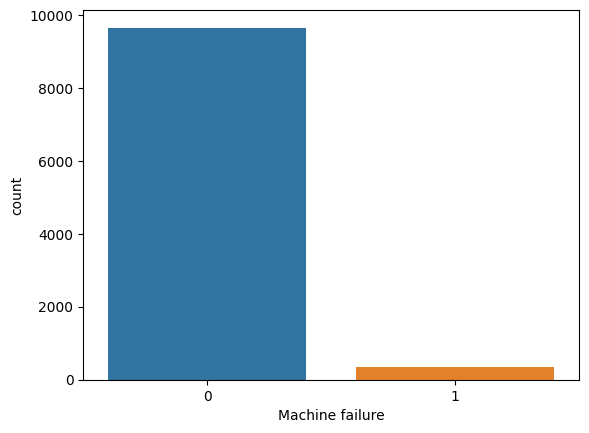

In [ ]:
# making a count plot for "Machine failure" column
sns.countplot(x='Machine failure', data=machine_data)

<Axes: xlabel='Type', ylabel='count'>

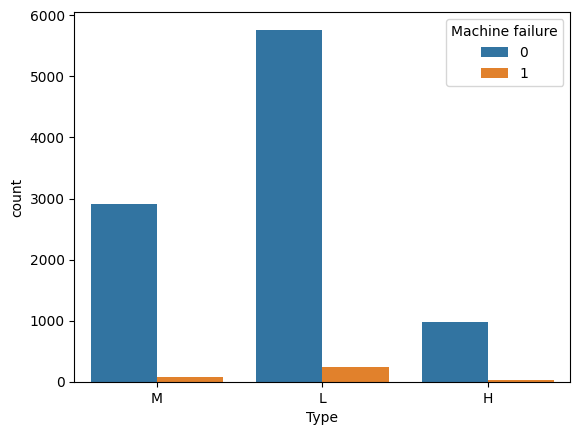

In [ ]:
# number of Machine failure quality Type wise
sns.countplot(x='Type', hue='Machine failure', data=machine_data)

<ipython-input-44-388fdabdf589>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(machine_data['Process temperature [K]'])


<Axes: xlabel='Process temperature [K]', ylabel='Density'>

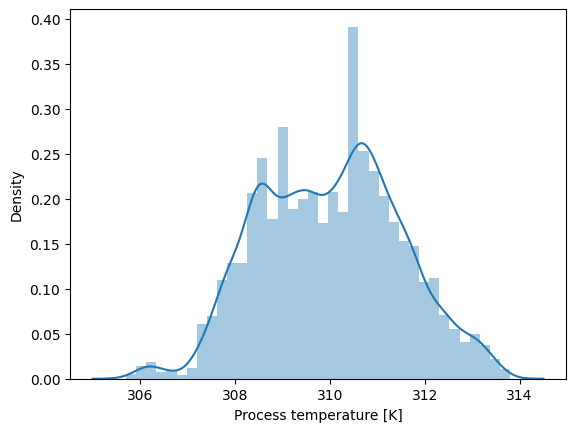

In [ ]:
sns.distplot(machine_data['Process temperature [K]'])

<Axes: xlabel='Air temperature [K]', ylabel='Count'>

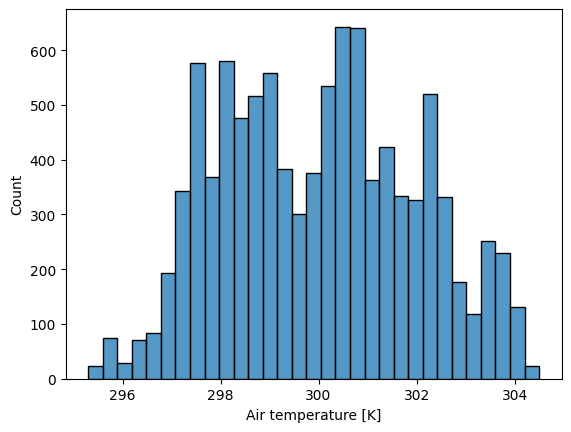

In [ ]:
sns.histplot(machine_data['Air temperature [K]'])

<ipython-input-48-3d6ffba23d32>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(machine_data['Rotational speed [rpm]'])


<Axes: xlabel='Rotational speed [rpm]', ylabel='Density'>

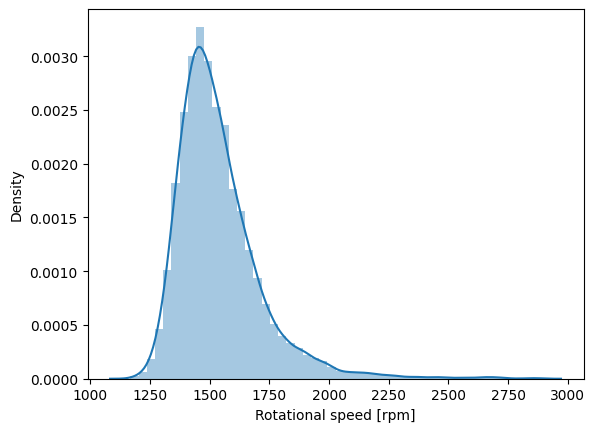

In [ ]:
sns.distplot(machine_data['Rotational speed [rpm]'])

<Axes: xlabel='Torque [Nm]', ylabel='Count'>

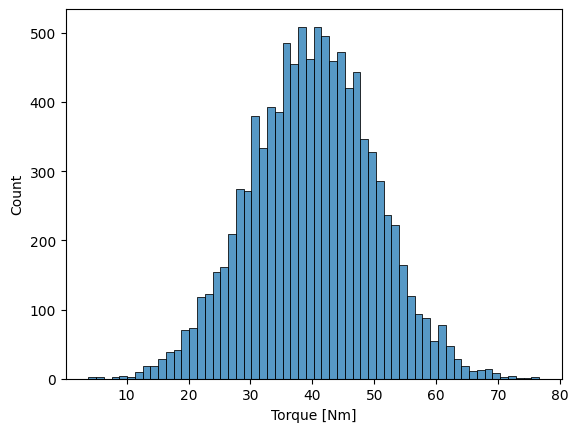

In [ ]:
sns.histplot(machine_data['Torque [Nm]'])

##Converting Categorical Features

In [ ]:
machine_data['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [ ]:
# converting categorical Columns
machine_data.replace({'Type':{'L':0,'M':1,'H':2}}, inplace=True)

In [ ]:
machine_data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


#Buliding Model

Separating features & Target

In [ ]:
X = machine_data.drop('Machine failure',axis=1)
Y = machine_data['Machine failure']

In [ ]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0,0,0,0,0
9996,2,298.9,308.4,1632,31.8,17,0,0,0,0,0
9997,1,299.0,308.6,1645,33.4,22,0,0,0,0,0
9998,2,299.0,308.7,1408,48.5,25,0,0,0,0,0


In [ ]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64

###Splitting the data into training data & Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(10000, 11) (8000, 11) (2000, 11)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(10000,) (8000,) (2000,)


#Model Training

###Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=5000)

In [ ]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=5000)

#Model Evaluation

###Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)

[0 0 0 ... 0 0 0]


In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.99875


In [ ]:
# accuracy on test data
Y_prediction = model.predict(X_test)

In [ ]:
print(Y_prediction)

[0 0 0 ... 0 0 0]


In [ ]:
test_data_accuracy = accuracy_score(Y_test, Y_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0


In [ ]:
confusion_matrix(Y_test,Y_prediction)

array([[1927,    0],
       [   0,   73]])

In [ ]:
print(classification_report(Y_test,Y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1927
           1       1.00      1.00      1.00        73

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

